This python notebook is based on the book "Python for Finance: Mastering Data-Driven Finance" by Yves Hilpisch.

Elaborated by: Francisco Arizola

# Part III: Financial Data Science

## Chapter 12: Stochastics

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import math
import numpy.random as npr

# Style pyplot with serif font
plt.rcParams['font.family'] = 'serif'

# 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

# Comment the next line if you do not have cufflinks and plotly installed
!pip install cufflinks plotly

import pandas as pd
import cufflinks as cf 
import plotly.offline as plyo

# Initialize plotly to work in offline mode
plyo.init_notebook_mode(connected=True)

# Optional: if you are using Jupyter Notebook, you might want to enable inline plotting
cf.go_offline()

### Random Numbers

In [2]:
# Fixes the seed value for reproducibility and fixes the number of digits for printouts.
npr.seed(100)
np.set_printoptions(precision=4)

# Uniformly distributed random numbers as one-dimensional ndarray object
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [3]:
# Uniformly distributed random numbers as two-dimensional ndarray object
npr.rand(5, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [4]:
# Transformation to another interval
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [5]:
# The same transformation for two dimensions.
npr.rand(5, 5) * (b - a) + a

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

Text(0.5, 1.0, 'choice')

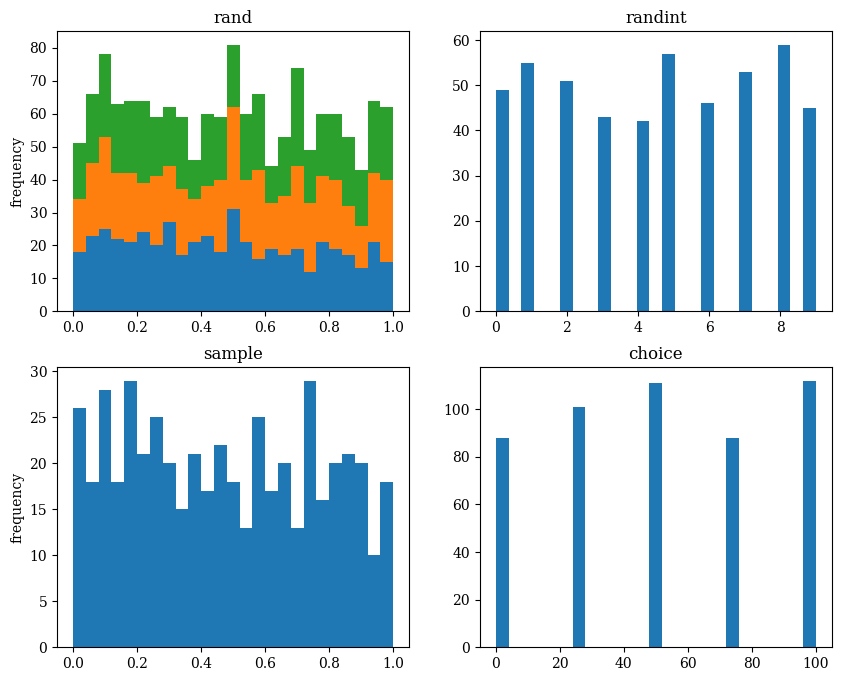

In [6]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

Text(0.5, 1.0, 'Poisson')

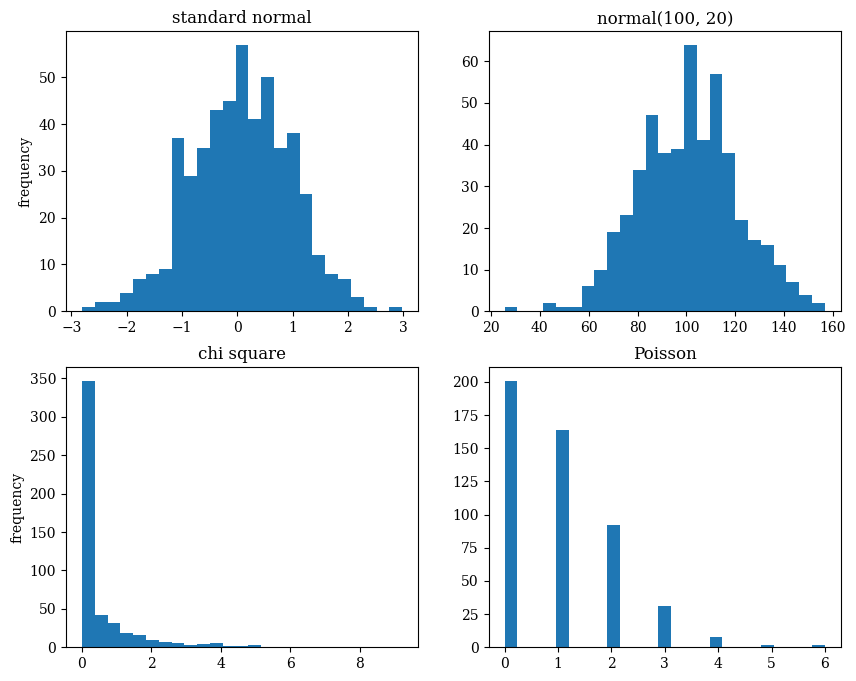

In [7]:
sample_size = 500
rn1 = npr.standard_normal(sample_size) # Standard normal with mean of 0 and standard deviation of 1
rn2 = npr.normal(100, 20, sample_size) # Normal with mean of 100 and standard deviation of 20
rn3 = npr.chisquare(df=0.5, size=sample_size) # Chi square with 0.5 degrees of freedom
rn4 = npr.poisson(lam=1.0, size=sample_size) # Poisson with lambda of 1

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

### Simulation

#### Equation 12-1. Simulating future index level in Black-Scholes-Merton setup

$$
S_T = S_0 \exp \left( \left( r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} z \right)
$$

The variables and parameters have the following meaning:

- $ S_T $: Index level at date $ T $
- $ r $: Constant riskless short rate
- $ \sigma $: Constant volatility (standard deviation of returns) of $ S $
- $ z $: Standard normally distributed random variable

Text(0, 0.5, 'frequency')

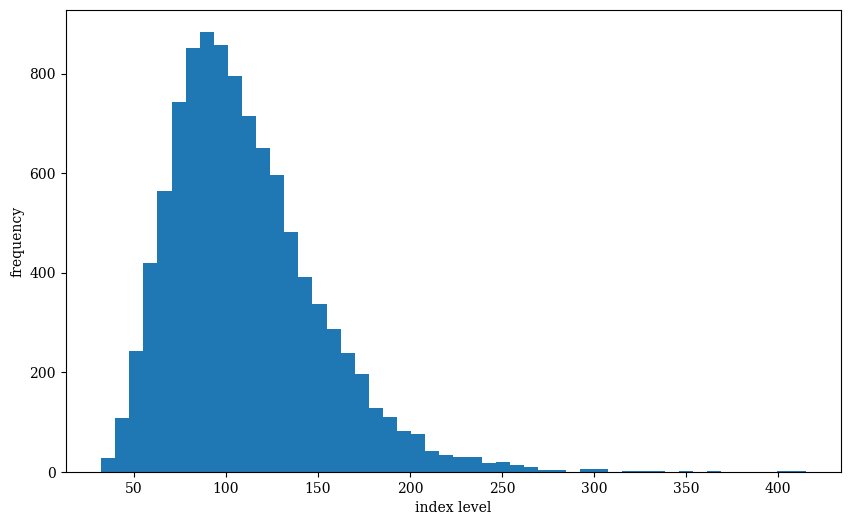

In [8]:
S0 = 100 # The initial index level.
r = 0.05 # The constant riskless short rate.
sigma = 0.25 # The constant volatility factor.
T = 2.0 # The horizon in year fractions.
I = 10000 # The number of simulations.

#  The simulation (formula above)
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))

plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

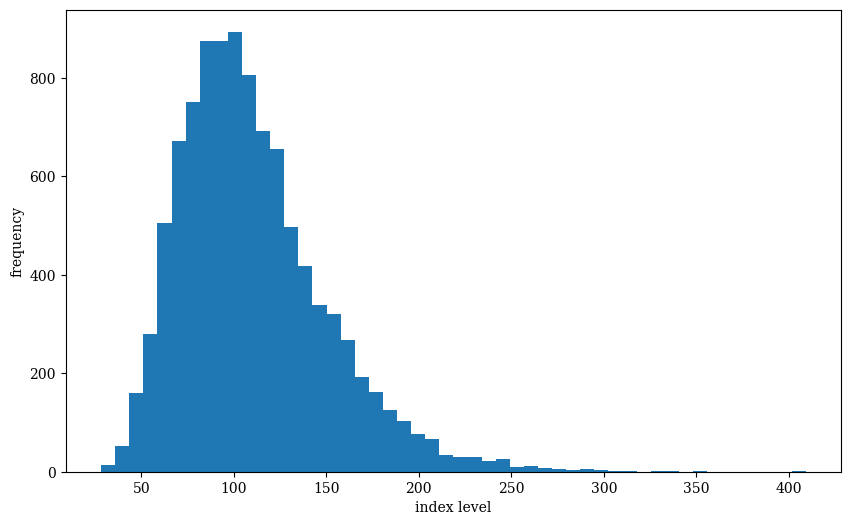

In [9]:
# One could therefore also try to use the npr.lognormal() function to directly derive the values for a random variable with 
# log normal distribution
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,sigma * math.sqrt(T), size=I)

plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [10]:
# To compare the distributional characteristics of simulation results, the scipy.stats subpackage and the helper function 
# print_statistics() are used
import scipy.stats as scs

def print_statistics(a1, a2):
 ''' Prints selected statistics.
 Parameters
 ==========
 a1, a2: ndarray objects
 results objects from simulation
 '''
 sta1 = scs.describe(a1)
 sta2 = scs.describe(a2)
 print('%14s %14s %14s' %('statistic', 'data set 1', 'data set 2'))
 print(45 * "-")
 print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
 print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
 print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
 print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
 print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),np.sqrt(sta2[3])))
 print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
 print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


#### Stochastic Processes

Roughly speaking, a stochastic process is a sequence of random variables. In that sense, one should expect something similar to a sequence of repeated simulations of a random variable when simulating a process. This is mainly true, apart from the fact
that the draws are typically not independent but rather depend on the result(s) of the previous draw(s). In general, however, stochastic processes used in finance exhibit the Markov property, which mainly says that tomorrow’s value of the process only
depends on today’s state of the process, and not any other more “historic” state or even the whole path history. The process then is also called memoryless.

In [11]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * npr.standard_normal(I))

Text(0, 0.5, 'frequency')

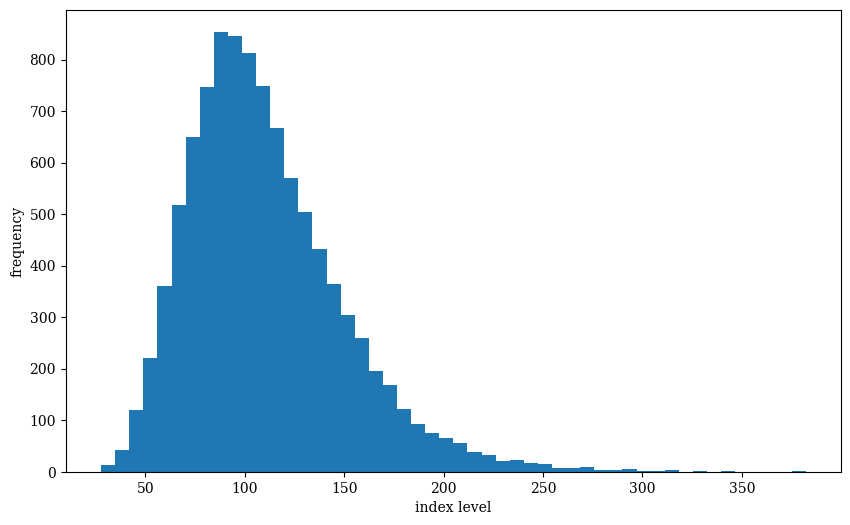

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [13]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.423        110.431
           std         39.179         39.878
          skew          1.069          1.115
      kurtosis          2.028          2.217


Text(0, 0.5, 'index level')

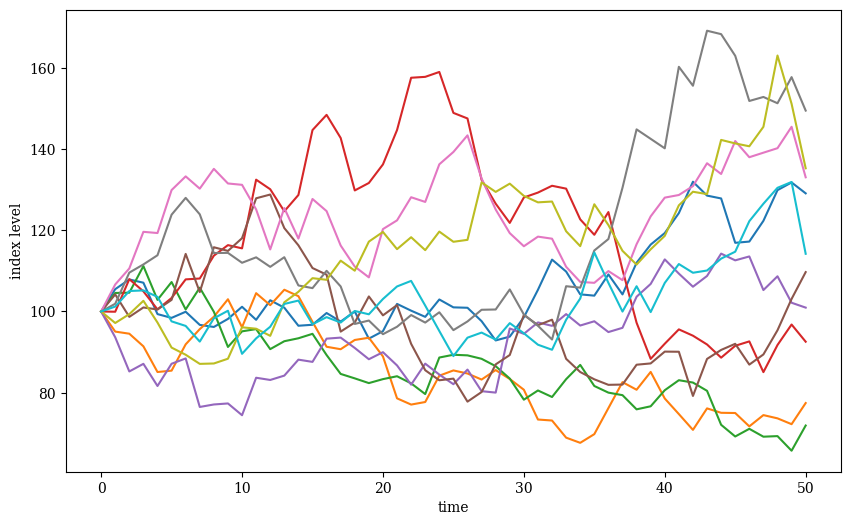

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

#### Square-root diffusion

Another important class of financial processes is **mean-reverting processes**, which are used to model short rates or volatility processes, for example. A popular and widely used model is the **square-root diffusion**, as proposed by Cox, Ingersoll, and Ross (1985). Equation 12-4 provides the respective SDE.

##### Equation 12-4. Stochastic differential equation for square-root diffusion

$$
dx_t = \kappa (\theta - x_t) dt + \sigma \sqrt{x_t} dZ_t
$$

The variables and parameters have the following meaning:

- $ x_t $: Process level at date $ t $
- $ \kappa $: Mean-reversion factor
- $ \theta $: Long-term mean of the process
- $ \sigma $: Constant volatility parameter
- $ Z_t $: Standard Brownian motion

In [15]:
x0 = 0.05
kappa = 3.0 # The mean reversion factor
theta = 0.02 # The long-term mean value
sigma = 0.1 
I = 10000
M = 50
dt = T / M

def srd_euler():
 xh = np.zeros((M + 1, I))
 x = np.zeros_like(xh)
 xh[0] = x0
 x[0] = x0
 for t in range(1, M + 1):
     xh[t] = (xh[t - 1] + 
              kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
              sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
              math.sqrt(dt) * npr.standard_normal(I)) # The simulation based on an Euler scheme
 x = np.maximum(xh, 0)
 return x


x1 = srd_euler()

Text(0, 0.5, 'frequency')

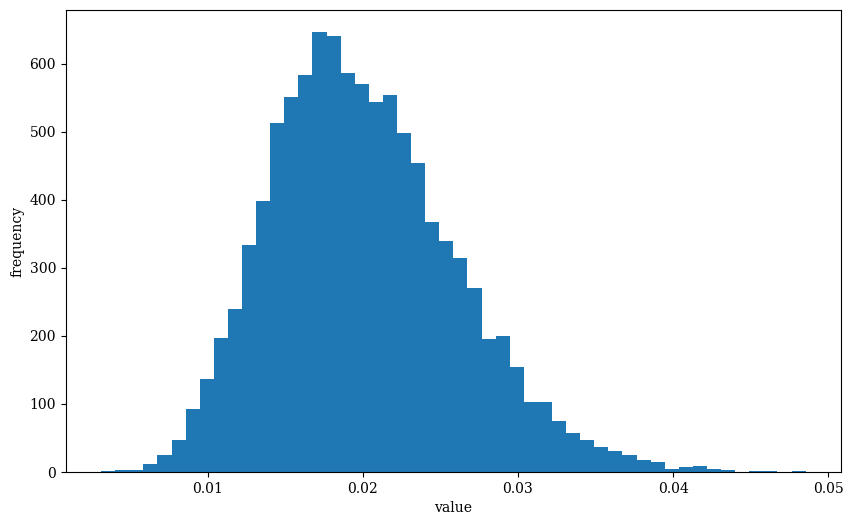

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

### Valuation

One of the most important applications of Monte Carlo simulation is the valuation of contingent claims (options, derivatives, hybrid instruments, etc.). Simply stated, in a risk-neutral world, the value of a contingent claim is the discounted expected payoff under the risk-neutral (martingale) measure. This is the probability measure that makes all risk factors (stocks, indices, etc.) drift at the riskless short rate, making the discounted processes martingales. According to the Fundamental Theorem of Asset Pricing, the existence of such a probability measure is equivalent to the absence of arbitrage. A financial option embodies the right to buy (call option) or sell (put option) a specified financial instrument at a given maturity date (European option), or over a specified period of time (American option), at a given price (strike price).

#### European Options

The payoff of a European call option on an index at maturity is given by $h(S_T) \equiv \max(S_T - K, 0)$, where $S_T$ is the index level at maturity date $T$ and $K$ is the strike price. Given a, or in complete markets **the**, risk-neutral measure for the relevant stochastic process (e.g., geometric Brownian motion), the price of such an option is given by the formula in Equation 12-10.

##### Equation 12-10. Pricing by risk-neutral expectation

$$
C_0 = e^{-rT} \mathbb{E}_0^Q (h(S_T)) = e^{-rT} \int_0^\infty h(s) q(s) ds
$$

- $C_0$: The price of the European call option at time 0
- $r$: Constant risk-free rate
- $T$: Time to maturity
- $h(S_T)$: Payoff function of the option at maturity
- $\mathbb{E}_0^Q$: Expectation under the risk-neutral measure
- $q(s)$: Risk-neutral probability density function

Chapter 11 sketches how to numerically evaluate an integral by Monte Carlo simulation. This approach is used in the following and applied to Equation 12-10. Equation 12-11 provides the respective Monte Carlo estimator for the European option, where $\hat{S}_T^i$ is the $i$th simulated index level at maturity.

##### Equation 12-11. Risk-neutral Monte Carlo estimator

$$
\hat{C}_0 = e^{-rT} \frac{1}{I} \sum_{i=1}^I h(\hat{S}_T^i)
$$

- $\hat{C}_0$: The Monte Carlo estimate of the option price
- $I$: Total number of simulated paths
- $\hat{S}_T^i$: The $i$th simulated value of the index level at maturity
- $h(\hat{S}_T^i)$: Payoff function of the $i$th simulated path at maturity

Consider now the following parameterization for the geometric Brownian motion and the valuation function `gbm_mcs_stat()`, taking as a parameter only the strike price. Here, only the index level at maturity is simulated. As a reference, consider the case with a strike price of $K = 105$

In [17]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
 ''' Function to generate random numbers for simulation.
 Parameters
 ==========
 M: int
 number of time intervals for discretization
 I: int
 number of paths to be simulated
 anti_paths: boolean
 use of antithetic variates
 mo_math: boolean
 use of moment matching
 '''
 if anti_paths is True:
     sn = npr.standard_normal((M + 1, int(I / 2)))
     sn = np.concatenate((sn, -sn), axis=1)
 else:
     sn = npr.standard_normal((M + 1, I))
 if mo_match is True:
     sn = (sn - sn.mean()) / sn.std()
 return sn

In [18]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

def gbm_mcs_stat(K):
 ''' Valuation of European call option in Black-Scholes-Merton
 by Monte Carlo simulation (of index level at maturity)
 Parameters
 ==========
 K: float (positive) strike price of the option
 Returns
 =======
 C0: float estimated present value of European call option
 '''
 sn = gen_sn(1, I)
 # simulate index level at maturity
 ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1])
 # calculate payoff at maturity
 hT = np.maximum(ST - K, 0)
 # calculate MCS estimator
 C0 = math.exp(-r * T) * np.mean(hT)
 return C0

gbm_mcs_stat(K=105.) # The Monte Carlo estimator value for the European call option

10.102939221984663

In [19]:
M = 50 # Number of time intervals

# Now, we consider both put and call options
def gbm_mcs_dyna(K, option='call'):
 ''' Valuation of European options in Black-Scholes-Merton
 by Monte Carlo simulation (of index level paths)
 Parameters
 ==========
 K: float
 (positive) strike price of the option
 option : string
 type of the option to be valued ('call', 'put')
 Returns
 =======
 C0: float
 estimated present value of European call option
 '''
 dt = T / M
 # simulation of index level paths
 S = np.zeros((M + 1, I))
 S[0] = S0
 sn = gen_sn(M, I)
 for t in range(1, M + 1):
     S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
 # case-based calculation of payoff
 if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
 else:
        hT = np.maximum(K - S[-1], 0)
 # calculation of MCS estimator
 C0 = math.exp(-r * T) * np.mean(hT)
 return C0

In [20]:
# Call case
gbm_mcs_dyna(K=110., option='call')

8.022682702065655

In [21]:
# Put case
gbm_mcs_dyna(K=110., option='put')

12.6584447578876

In [24]:
from scipy.stats import norm

def bsm_call_value(S0, K, T, r, sigma):
    """
    Calculates the Black-Scholes-Merton call option value.
    
    Parameters:
    S0 : float
        Initial stock/index level
    K : float
        Strike price
    T : float
        Time to maturity (in year fractions)
    r : float
        Constant risk-free short rate
    sigma : float
        Volatility of the underlying asset
        
    Returns:
    value : float
        Present value of the European call option
    """
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    value = (S0 * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2))
    return value

In [27]:
S0 = 100  # Initial stock/index level
K = 105   # Strike price
T = 1.0   # Time to maturity (in year fractions)
r = 0.05  # Constant risk-free short rate
sigma = 0.2  # Volatility of the underlying asset

bsm_call_value(S0, K, T, r, sigma)

8.021352235143176

#### American options

The valuation of American options is more involved compared to European options. In this case, an **optimal stopping problem** has to be solved to come up with a fair value of the option. 

Equation 12-12 formulates the valuation of an American option as such a problem. The problem formulation is already based on a discrete time grid for use with numerical simulation. In a sense, it is therefore more correct to speak of an option value given Bermudan exercise. For the time interval converging to zero length, the value of the Bermudan option converges to the one of the American option.

##### Equation 12-12. American option prices as optimal stopping problem
$$
V_0 = \sup_{\tau \in (0, \Delta t, 2\Delta t, \ldots, T)} \mathbb{E}_0 \left[ e^{-rT} h_\tau(S_\tau) \right]
$$

- $V_0$: The value of the American option at the initial time.
- $\tau$: The stopping time, which is chosen to maximize the expected payoff.
- $\mathbb{E}_0$: The expectation operator under the risk-neutral measure.
- $e^{-rT}$: The discount factor, where $r$ is the constant risk-free short rate and \(T\) is the time to maturity.
- $h_\tau(S_\tau)$: The payoff function at stopping time $\tau$, where $S_\tau$ is the underlying asset price at time $\tau$.

The algorithm described in the following is called **Least-Squares Monte Carlo (LSM)** and is from the paper by Longstaff and Schwartz (2001). It can be shown that the value of an American (Bermudan) option at any given date \(t\) is given as:

$$
V_t(s) = \max \left( h_t(S_t), \mathbb{E}_t \left[ e^{-r \Delta t} V_{t + \Delta t}(S_{t + \Delta t}) \mid S_t = s \right] \right)
$$

where $C_t(s) = \mathbb{E}_t \left[ e^{-r \Delta t} V_{t + \Delta t}(S_{t + \Delta t}) \mid S_t = s \right]$ is the so-called **continuation value** of the option given an index level of $S_t = s$.

Given a set of basis functions $b_d, d = 1, \ldots, D$, the continuation value is then given by the regression estimate:

$$
C_t(S_t) = \sum_{j=1}^D \alpha_j \cdot b_j(S_t)
$$

The optimal regression parameters $\alpha$ are the solution of the least-squares problem stated in Equation 12-13.

##### Equation 12-13. Least-squares regression for American option valuation
$$
\min_{\alpha} \frac{1}{I} \sum_{i=1}^I \left( Y_{i,t} - \sum_{j=1}^D \alpha_j \cdot b_j(S_{i,t}) \right)^2
$$

- $\alpha_j$: Regression coefficients for the basis functions $b_j(S_t)$.
- $Y_{i,t} \equiv e^{-r \Delta t} V_{t + \Delta t}(S_{i, t + \Delta t})$: Simulated continuation value for path \(i\) at time \(t\).
- $S_{i,t}$: Index level for path $i$ at time $t$.
- $I$: Total number of simulated paths.

This approach uses a cross-section of simulated continuation values to estimate the expected (continuation) value by least-squares regression.

In [29]:
# LSM algorithm for both American call and put options
def gbm_mcs_amer(K, option='call'):
 ''' Valuation of American option in Black-Scholes-Merton
 by Monte Carlo simulation by LSM algorithm
 Parameters
 ==========
 K: float
 (positive) strike price of the option
 option: string
 type of the option to be valued ('call', 'put')
 Returns
 =======
 C0: float
 estimated present value of American call option
 '''
 dt = T / M
 df = math.exp(-r * dt)
 # simulation of index levels
 S = np.zeros((M + 1, I))
 S[0] = S0
 sn = gen_sn(M, I)
 for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
 # case based calculation of payoff
 if option == 'call':
        h = np.maximum(S - K, 0)
 else:
        h = np.maximum(K - S, 0)
 # LSM algorithm
 V = np.copy(h)
 for t in range(M - 1, 0, -1):
     reg = np.polyfit(S[t], V[t + 1] * df, 7)
     C = np.polyval(reg, S[t])
     V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
 # MCS estimator
 C0 = df * np.mean(V[1])
 return C0

In [30]:
# Call case
gbm_mcs_amer(110., option='call')

C:\Users\Franc\AppData\Local\Temp\ipykernel_1692\259704086.py:2: RankWarning:

Polyfit may be poorly conditioned



5.869061972135799

In [31]:
# Put case
gbm_mcs_amer(110., option='call')

C:\Users\Franc\AppData\Local\Temp\ipykernel_1692\3529226612.py:2: RankWarning:

Polyfit may be poorly conditioned



5.872932300984487

The European value of an option represents a lower bound to the American option’s value. The difference is generally called the early exercise premium.

### Risk Measures

#### Value-at-Risk (VaR)

VaR is a number denoted in currency units (e.g., USD, EUR, JPY) indicating a loss (of a portfolio, a single position, etc.) that is not exceeded with some confidence level (probability) over a given period of time.

Text(0, 0.5, 'frequency')

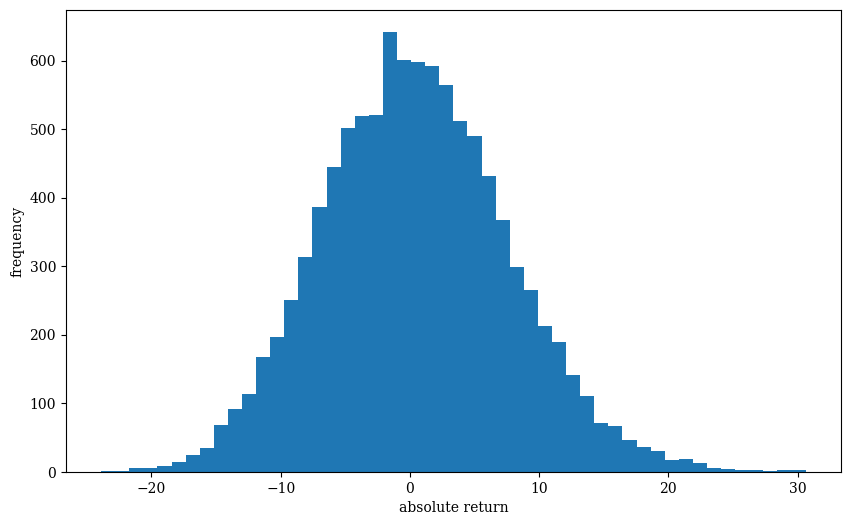

In [32]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365 # a period of 30 days
I = 10000

# Simulate end-of-period values for the geometric Brownian motion 
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

# Calculate the absolute profits and losses per simulation run and sorts the values
R_gbm = np.sort(ST - S0)

# Plot
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')

In [33]:
# Print results in a table
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.102
           99.90           19.973
           99.00           15.025
           97.50           13.019
           95.00           11.022
           90.00            8.563


#### Credit Valuation Adjustments

Other important risk measures are the **credit value-at-risk (CVaR)** and the **credit valuation adjustment (CVA)**, which is derived from the CVaR. 

Roughly speaking, CVaR is a measure for the risk resulting from the possibility that a counterparty might not be able to honor its obligations—for example, if the counterparty goes bankrupt. In such a case there are two main assumptions to be made: the probability of default and the (average) loss level.

In [35]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

# Define the loss level
L = 0.5

# Define the probability of default
p = 0.01

# Simulate default events with a poisson distribution
D = npr.poisson(p * T, I)

# Limit defaults to one such event
D = np.where(D > 1, 1, D)

In [36]:
# Discounted average simulated value of the asset at T
math.exp(-r * T) * np.mean(ST)

100.08214331296449

In [37]:
# CVaR as the discounted average of the future losses in the case of a default
CVaR = math.exp(-r * T) * np.mean(L * D * ST)
CVaR

0.5203718793268923

In [38]:
# Current price of the asset adjusted by the simulated CVaR
S0_adj = S0 - CVaR
S0_adj

99.47962812067311

In [39]:
# Discounted average simulated value of the asset at T, adjusted for the simulated losses from default
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
S0_CVA

99.5617714336376

Finally, the following presents an implementation of central functions related to the BlackScholes-Merton model for the analytical pricing of European (call) options.

In [40]:
#
# Valuation of European call options
# in Black-Scholes-Merton model
# incl. vega function and implied volatility estimation
# bsm_functions.py
#
# (c) Dr. Yves J. Hilpisch
# Python for Finance, 2nd ed.
#
def bsm_call_value(S0, K, T, r, sigma):
 ''' Valuation of European call option in BSM model.
 Analytical formula.
 Parameters
 ==========
 S0: float
 initial stock/index level
 K: float
 strike price
 T: float
 maturity date (in year fractions)
 r: float
 constant risk-free short rate
 sigma: float
 volatility factor in diffusion term
 Returns
 =======
 value: float
 present value of the European call option
 '''
 from math import log, sqrt, exp
 from scipy import stats

 S0 = float(S0)
 d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
 d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
 # stats.norm.cdf --> cumulative distribution function
 # for normal distribution
 value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
 return value

In [41]:
# Vega function
def bsm_vega(S0, K, T, r, sigma):
 ''' Vega of European option in BSM model.
 Parameters
 ==========
 S0: float
 initial stock/index level
 K: float
 strike price
 T: float
 maturity date (in year fractions)
 r: float
 constant risk-free short rate
 sigma: float
 volatility factor in diffusion term
 Returns
 =======
 vega: float
 partial derivative of BSM formula with respect
 to sigma, i.e. vega
 '''
 from math import log, sqrt
 from scipy import stats
 S0 = float(S0)
 d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
 vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
 return vega

In [42]:
# Implied volatility function
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
 ''' Implied volatility of European call option in BSM model.
 Parameters
 ==========
 S0: float
 initial stock/index level
 K: float
 strike price
 T: float
 maturity date (in year fractions)
 r: float
 constant risk-free short rate
 sigma_est: float
 estimate of impl. volatility
 it: integer
 number of iterations
 Returns
 =======
 simga_est: float
 numerically estimated implied volatility
 '''
 for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) / bsm_vega(S0, K, T, r, sigma_est))
 return sigma_est